# 가설 1. 고객 가구의 자녀 수에 따라 지난 2년간 과자에 지출한 금액이 차이가 있을 것이다

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm

In [4]:
path = os.getcwd()
file_path = os.path.join(path,"file")
marketing_data = pd.read_csv(os.path.join(file_path,"marketing_campaign.csv"), sep='\t')
print(marketing_data.head(5))
print(marketing_data.dtypes)

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

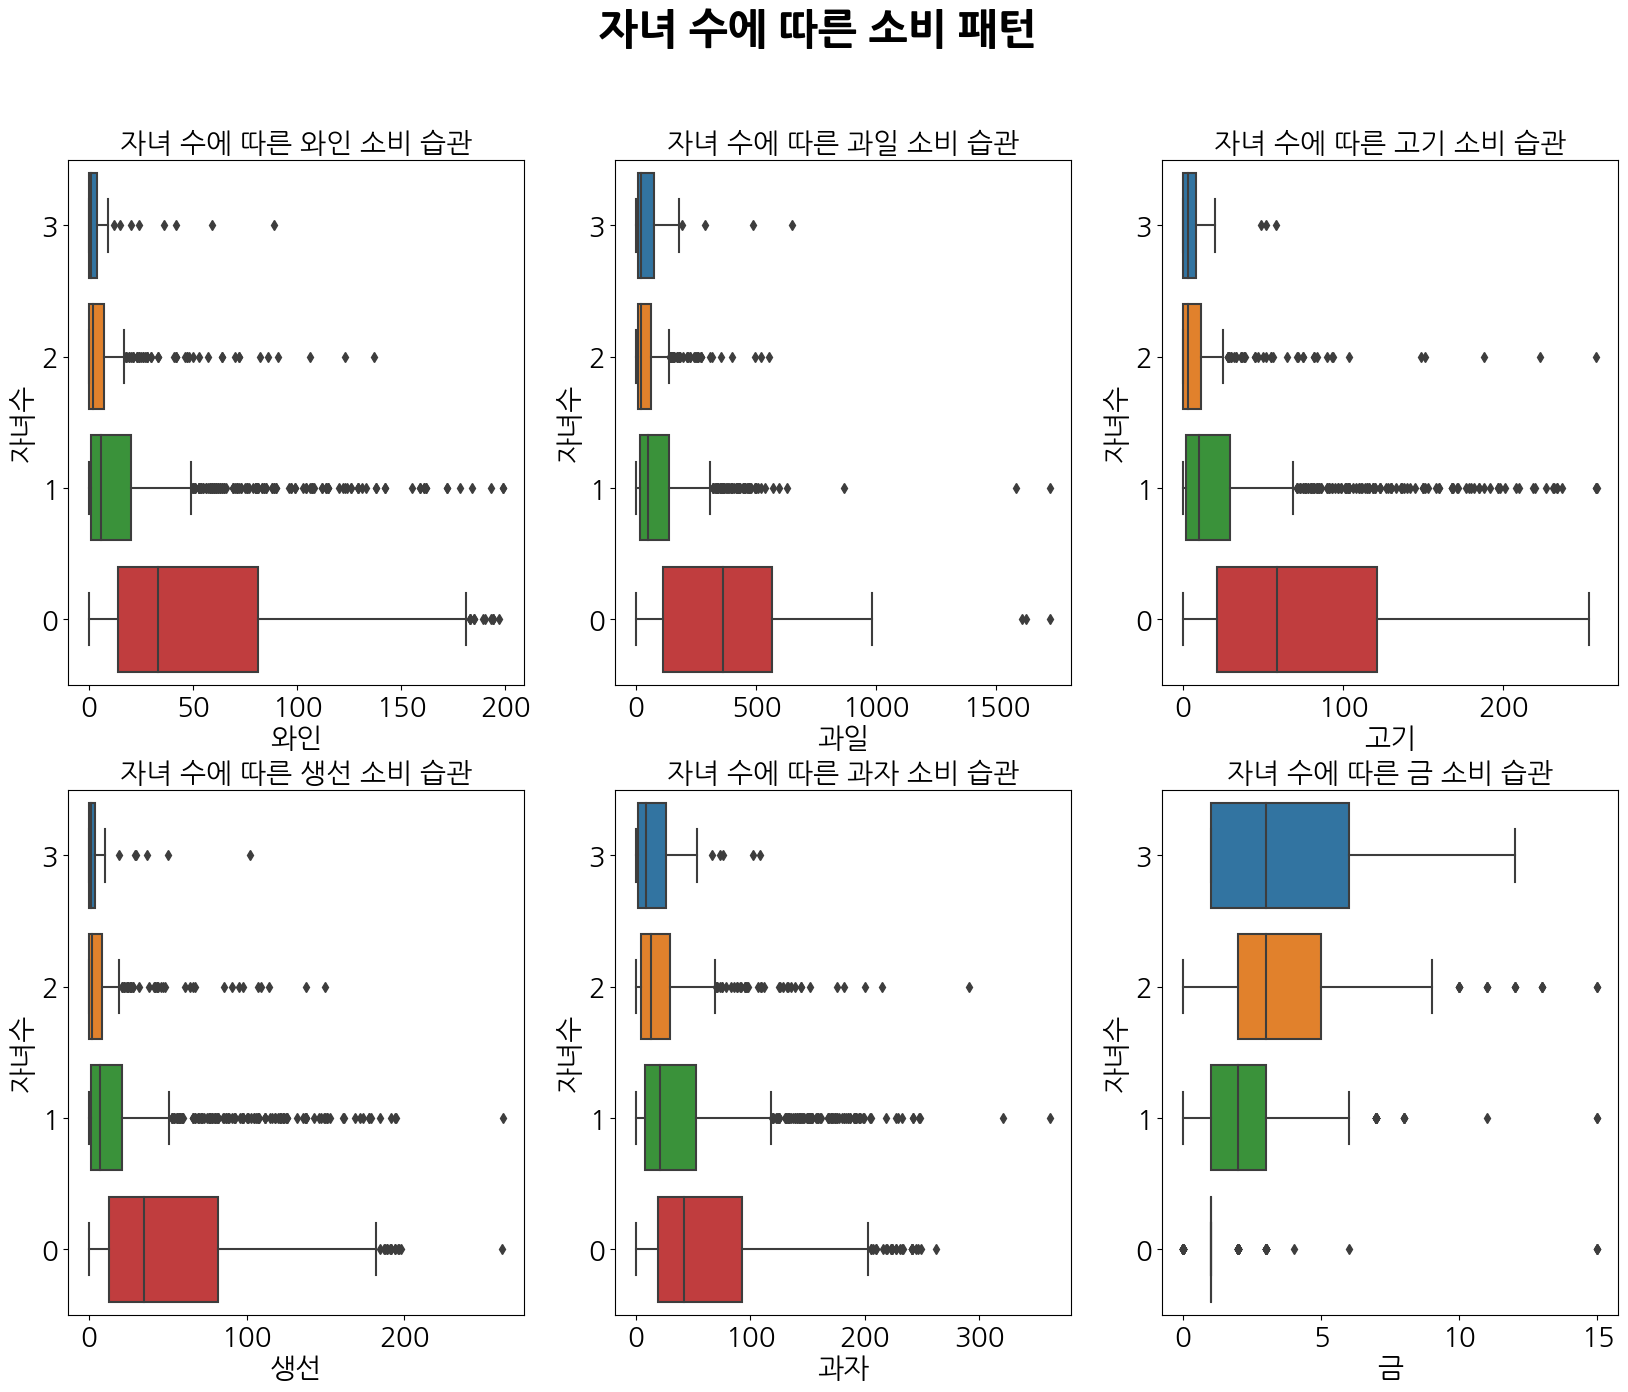

In [42]:
#이에 미루어 봤을 때 자녀수가 적으면 적을 수록 식습관 지출이 비례한다는 것을 알 수 있다.
#또한 반대로, 자녀수가 많으면 많을 수록 금 소비가 비례한다는 것을 알 수 있다.

Label = ["와인","과일","고기","생선","과자","금"]
plt.rcParams['font.family'] = "NanumGothic"
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

marketing_data['Children'] = (marketing_data['Kidhome'] + marketing_data['Teenhome']).astype(str)
marketing_data = marketing_data.sort_values(by='Children', ascending=False)
fig = plt.figure(figsize=(20,15))
fig.suptitle('자녀 수에 따른 소비 패턴',fontweight ="bold",fontsize = 30) 
for i,money_column in enumerate(marketing_data.columns[10:16]):
    row = i//3
    column = i%3
    sns.boxplot(data=marketing_data, x=money_column, y='Children', ax=plt.subplot2grid((2,3), (row,column)))
    plt.xlabel(Label[i],fontsize=20)
    plt.ylabel("자녀수",fontsize=20)
    plt.title("자녀 수에 따른 " + Label[i] + " 소비 습관",fontsize=20)
plt.show()